In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
!pip install seaborn
from Utilities import *

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/storage/software/easybuild/software/Python/3.8.6-GCCcore-10.2.0/bin/python3.8 -m pip install --upgrade pip' command.


In [29]:
df = pd.read_hdf("/storage/shared/data/2lep_df_forML_bkg_signal_fromRDF.hdf5")
df_data = pd.read_hdf("/storage/shared/data/2lep_df_forML_data_fromRDF.hdf5")
print(df.keys())

Index(['njet20', 'njet60', 'nbjet60', 'nbjet70', 'nbjet77', 'nbjet85', 'isOS',
       'isSF', 'mll', 'mt2', 'met_et', 'met_phi', 'lep1_flav', 'lep1_pt',
       'lep1_eta', 'lep1_phi', 'lep1_E', 'lep1_ptcone30', 'lep1_etcone20',
       'lep1_trackd0pvunbiased', 'lep1_tracksigd0pvunbiased', 'lep1_isTightID',
       'lep1_z0', 'lep2_flav', 'lep2_pt', 'lep2_eta', 'lep2_phi', 'lep2_E',
       'lep2_ptcone30', 'lep2_etcone20', 'lep2_trackd0pvunbiased',
       'lep2_tracksigd0pvunbiased', 'lep2_isTightID', 'lep2_z0',
       'channelNumber', 'costhstar', 'weight', 'category', 'physdescr'],
      dtype='object')


In [30]:
otherCategories = [ 'topX', 'Higgs']

for cat in otherCategories:
    df.loc[df["category"] == cat,"category"] = "Other"

df_weight = df.weight

In [31]:
#cats = ['Other' ,'Diboson' , 'ttbar', 'Zjets','topX', 'SUSYSlepSlep']
cats = ['Wjets' , 'singleTop', 'Diboson' , 'ttbar', 'Zjets', 'Other','SUSYSlepSlep']

In [32]:

df_pt1 = []
df_pt2 = []
df_mep = []
df_mll = []
df_mt2 = []
df_bTag = []
df_njet20 = []
df_njet60 = []
df_isOS = []
nr_events_BC = []
weights = []

for i in range(len(cats)):
    index = df["category"] == cats[i]
    df_cat = df[index]
    weights.append(df_weight[index])
    df_pt1.append(df_cat["lep1_pt"].ravel()/1000)
    df_pt2.append(df_cat["lep2_pt"].ravel()/1000)
    df_mep.append(df_cat["met_et"].ravel()/1000)
    df_mll.append(df_cat["mll"].ravel()/1000)
    df_mt2.append(df_cat["mt2"].ravel()/1000)
    df_bTag.append(df_cat["nbjet77"].ravel())
    df_njet20.append(df_cat["njet20"].ravel())
    df_njet60.append(df_cat["njet60"].ravel())
    df_isOS.append(df_cat["isOS"].ravel())
    nr_events_BC.append(np.sum(weights[i].array))
    
    print(f"Nr of {cats[i]} events: {int(nr_events_BC[i])}")


sort_indx = sorted(range(len(nr_events_BC)), key=lambda k: nr_events_BC[k])


df_pt1 = [df_pt1[i] for i in sort_indx]
df_pt2 = [df_pt2[i] for i in sort_indx]
df_mep = [df_mep[i] for i in sort_indx]
df_mll = [df_mll[i] for i in sort_indx]
df_mt2 = [df_mt2[i] for i in sort_indx]
df_bTag = [df_bTag[i] for i in sort_indx]
df_njet20 = [df_njet20[i] for i in sort_indx]
df_njet60 = [df_njet60[i] for i in sort_indx]
df_isOS = [df_isOS[i] for i in sort_indx]
cats = [cats[i] for i in sort_indx]
weights = [weights[i] for i in sort_indx]

SUSY_ind = sort_indx[-1]



Nr of Wjets events: 302422
Nr of singleTop events: 21678
Nr of Diboson events: 45123
Nr of ttbar events: 210407
Nr of Zjets events: 10160023
Nr of Other events: 46140
Nr of SUSYSlepSlep events: 8831


In [33]:
def calcN(b, w, v):
    s = 0
    n = []
    for j in range(len(b)-1):
        s = 0
        for i in range(len(v)):
            s += np.sum(w[i][(v[i] < b[j+1]) * (v[i] > b[j])])
        n.append(s)
    return n

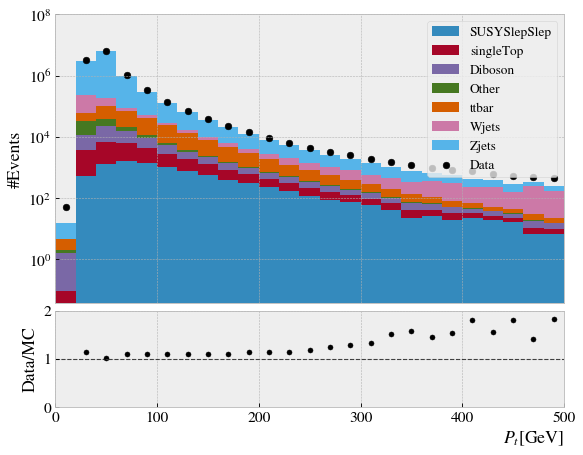

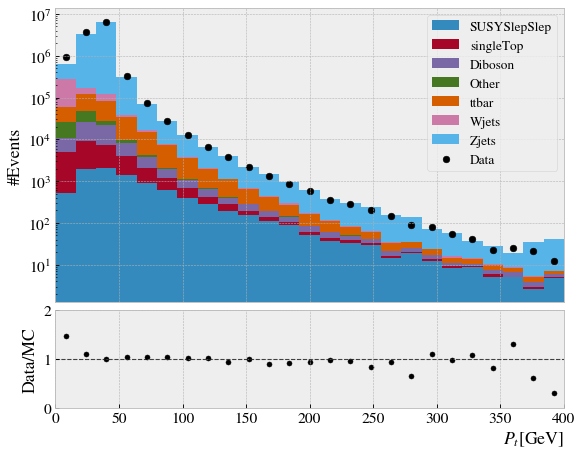

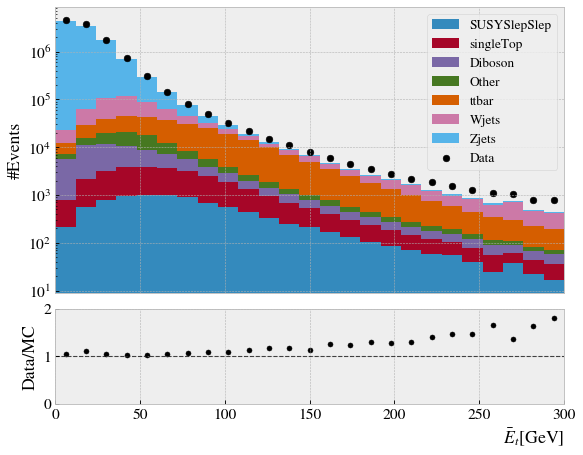

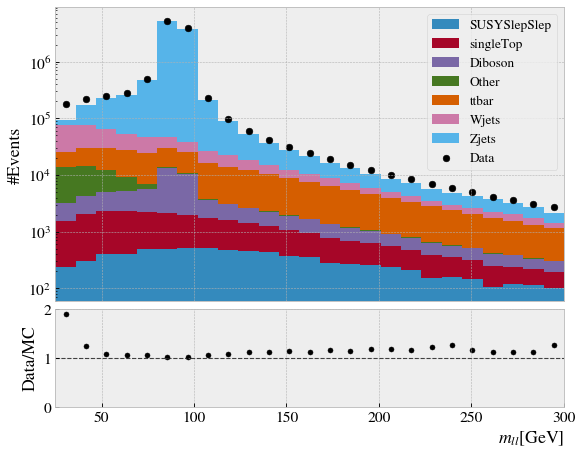

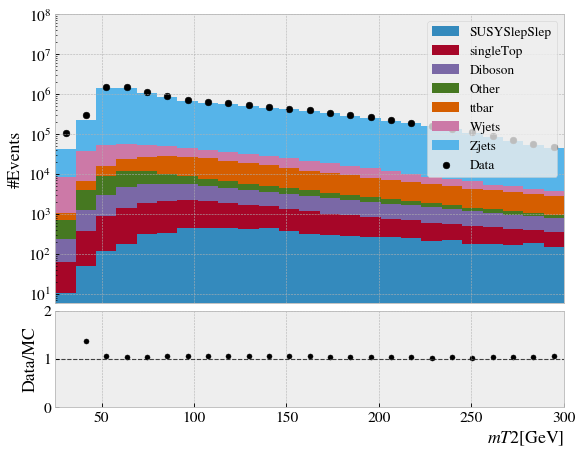

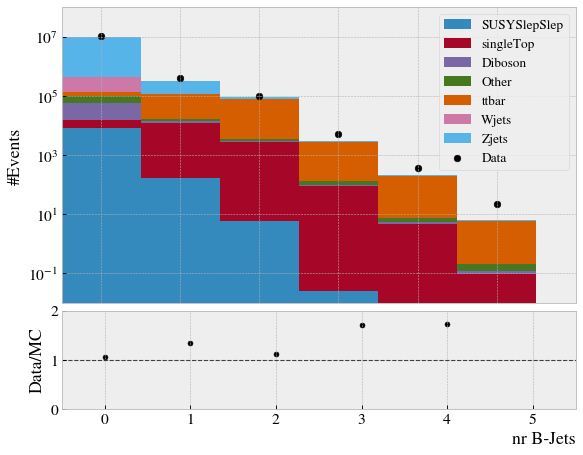

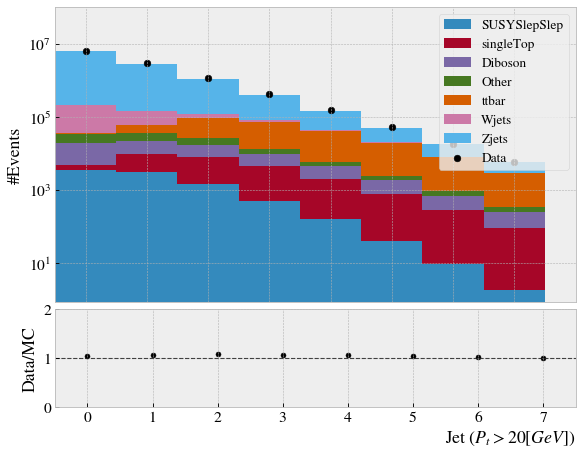

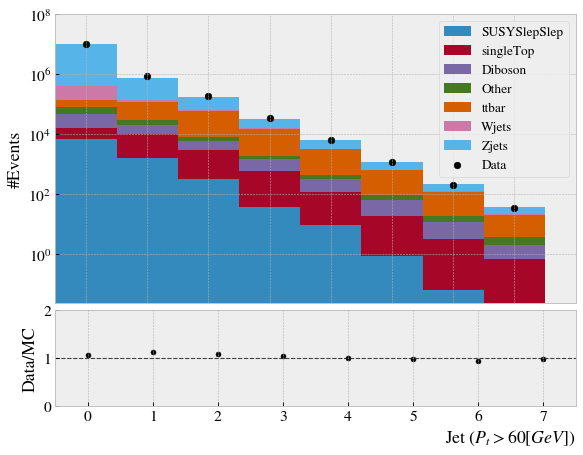

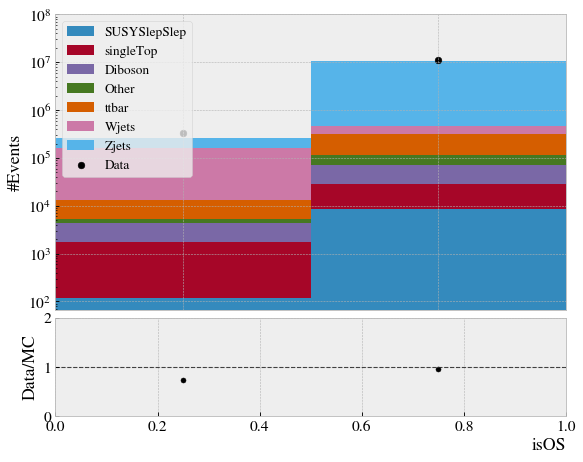

In [34]:
N, bins = np.histogram(df_data["lep1_pt"]/1000, bins = 25, range=(0,500))
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, num=0, dpi=80, facecolor='w', edgecolor='k',figsize = (7.4, 5.8))
ax1.set_yscale("log")
ax1.set_ylabel("#Events", fontsize=16)
ax1.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
n, bins, patches = ax1.hist(df_pt1, weights = weights, bins = 25, range=(0,500), histtype = "barstacked", stacked = True, label = cats)
ax1.scatter(x, N, c = "black", label = "Data")
ax1.legend(fontsize=12)
ax1.set_ylim(top = 1e8)
ax1.set_xlim([bins[0], bins[-1]])
n = calcN(bins, weights, df_pt1)

ax2.scatter(x , N/n, c = "k", alpha = 1, s = 20)
ax2.axhline(1, linestyle = "--", c = "k", alpha = 0.7, linewidth = 1)
ax2.set_xlabel(r"$P_t$[GeV]", fontsize=16, loc = "right")
ax2.set_xlim([bins[0], bins[-1]])
ax2.set_ylabel("Data/MC", fontsize =  16)
ax2.set_ylim([0.,2])
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/p_t1.pdf")
plt.show()



N, bins = np.histogram(df_data["lep2_pt"]/1000, bins = 25, range=(0,400))
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, num=0, dpi=80, facecolor='w', edgecolor='k',figsize = (7.4, 5.8))
ax1.set_yscale("log")
ax1.set_ylabel("#Events", fontsize=16)
ax1.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
n, bins, patches = ax1.hist(df_pt2, weights = weights, bins = 25, range=(0,400), histtype = "barstacked", stacked = True, label = cats)
ax1.scatter(x, N, c = "black", label = "Data")
ax1.legend(fontsize=12)
ax1.set_xlim([bins[0], bins[-1]])

n = calcN(bins, weights, df_pt2)
ax2.scatter(x , N/n, c = "k", alpha = 1, s = 20)
ax2.axhline(1, linestyle = "--", c = "k", alpha = 0.7, linewidth = 1)
ax2.set_xlabel(r"$P_t$[GeV]", fontsize=16, loc = "right")
ax2.set_xlim([bins[0], bins[-1]])
ax2.set_ylim([0, 2])
ax2.set_ylabel("Data/MC", fontsize =  16)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/p_t2.pdf")
plt.show()



N, bins = np.histogram(df_data["met_et"]/1000, bins = 25, range=(0,300))
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, num=0, dpi=80, facecolor='w', edgecolor='k',figsize = (7.4, 5.8))
ax1.set_yscale("log")
ax1.set_ylabel("#Events", fontsize=16)
ax1.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
n, bins, patches = ax1.hist(df_mep, weights = weights, bins = 25, range=(0,300), histtype = "barstacked", stacked = True, label = cats)
ax1.scatter(x, N, c = "black", label = "Data")
ax1.legend(fontsize=12)
ax1.set_xlim([bins[0], bins[-1]])

n = calcN(bins, weights, df_mep)
ax2.scatter(x , N/n, c = "k", alpha = 1, s = 20)
ax2.axhline(1, linestyle = "--", c = "k", alpha = 0.7, linewidth = 1)
ax2.set_xlabel(r"$\bar{E}_t$[GeV]", fontsize=16, loc = "right")
ax2.set_xlim([bins[0], bins[-1]])
ax2.set_ylim([0, 2])
ax2.set_ylabel("Data/MC", fontsize =  16)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/MET.pdf")
plt.show()



N, bins = np.histogram(df_data["mll"]/1000, bins = 25, range=(25,300))
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, num=0, dpi=80, facecolor='w', edgecolor='k',figsize = (7.4, 5.8))
ax1.set_yscale("log")
ax1.set_ylabel("#Events", fontsize=16)
ax1.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
n, bins, patches = ax1.hist(df_mll, weights = weights, bins = 25, range=(25,300), histtype = "barstacked", stacked = True, label = cats)
ax1.scatter(x, N, c = "black", label = "Data")
ax1.legend(fontsize=12)
ax1.set_xlim([bins[0], bins[-1]])

n = calcN(bins, weights, df_mll)
ax2.scatter(x , N/n, c = "k", alpha = 1, s = 20)
ax2.axhline(1, linestyle = "--", c = "k", alpha = 0.7, linewidth = 1)
ax2.set_xlabel(r"$m_{ll}$[GeV]", fontsize=16, loc = "right")
ax2.set_xlim([bins[0], bins[-1]])
ax2.set_ylim([0, 2])
ax2.set_ylabel("Data/MC", fontsize =  16)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/mll.pdf")
plt.show()


N, bins = np.histogram(df_data["mt2"]/1000, bins = 25, range=(25,300))
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, num=0, dpi=80, facecolor='w', edgecolor='k',figsize = (7.4, 5.8))
ax1.set_yscale("log")
ax1.set_ylabel("#Events", fontsize=16)
ax1.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
n, bins, patches = ax1.hist(df_mt2, weights = weights, bins = 25, range=(25,300), histtype = "barstacked", stacked = True, label = cats)
ax1.scatter(x, N, c = "black", label = "Data")
ax1.legend(fontsize=12)
ax1.set_xlim([bins[0], bins[-1]])
ax1.set_ylim(top = 1e8)

n = calcN(bins, weights, df_mt2)
ax2.scatter(x , N/n, c = "k", alpha = 1, s = 20)
ax2.axhline(1, linestyle = "--", c = "k", alpha = 0.7, linewidth = 1)
ax2.set_xlabel(r"$m{T2}$[GeV]", fontsize=16, loc = "right")
ax2.set_xlim([bins[0], bins[-1]])
ax2.set_ylim([0, 2])
ax2.set_ylabel("Data/MC", fontsize =  16)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/mT2.pdf")
plt.show()


N, bins = np.histogram(df_data["nbjet77"], np.arange(7)-0.5)
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, num=0, dpi=80, facecolor='w', edgecolor='k',figsize = (7.4, 5.8))
ax1.set_yscale("log")
ax1.set_ylabel("#Events", fontsize=16)
ax1.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
n, bins, patches = ax1.hist(df_bTag, weights = weights, bins = np.arange(7)-0.5+(bins[0]+bins[1])/2, histtype = "barstacked", stacked = True, label = cats)
ax1.scatter(x, N, c = "black", label = "Data")
ax1.legend(fontsize=12)
ax1.set_xlim([bins[0], bins[-1]])
ax1.set_ylim(top = 1e8)
ax1.set_xticks(np.arange(7)+(bins[0]+bins[1])/2, labels = [f"{i}" for i in range(7)])

n = calcN(bins, weights, df_bTag)
ax2.scatter(x , N/n, c = "k", alpha = 1, s = 20)
ax2.axhline(1, linestyle = "--", c = "k", alpha = 0.7, linewidth = 1)
ax2.set_xlabel(r"nr B-Jets", fontsize=16, loc = "right")
ax2.set_xlim([bins[0], bins[-1]])
ax2.set_ylim([0, 2])
ax2.set_ylabel("Data/MC", fontsize =  16)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/bTag.pdf")
plt.show()



N, bins = np.histogram(df_data["njet20"], np.arange(9)-0.5)
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, num=0, dpi=80, facecolor='w', edgecolor='k',figsize = (7.4, 5.8))
ax1.set_yscale("log")
ax1.set_ylabel("#Events", fontsize=16)
ax1.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
n, bins2, patches = ax1.hist(df_njet20, weights = weights, bins = np.arange(9)-0.5+(bins[0]+bins[1])/2, histtype = "barstacked", stacked = True, label = cats)
ax1.scatter(x, N, c = "black", label = "Data")
ax1.legend(fontsize=12)
ax1.set_xlim([bins[0], bins[-1]])
ax1.set_ylim(top = 1e8)
ax1.set_xticks(np.arange(9)+(bins[0]+bins[1])/2, labels = [f"{i}" for i in range(9)])

n = calcN(bins, weights, df_njet20)
ax2.scatter(x , N/n, c = "k", alpha = 1, s = 20)
ax2.axhline(1, linestyle = "--", c = "k", alpha = 0.7, linewidth = 1)
ax2.set_xlabel(r"Jet $(P_t>20[GeV])$", fontsize=16, loc = "right")
ax2.set_xlim([bins[0], bins[-1]])
ax2.set_ylim([0, 2])
ax2.set_ylabel("Data/MC", fontsize =  16)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/njet20.pdf")
plt.show()


N, bins = np.histogram(df_data["njet60"], np.arange(9)-0.5)
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, num=0, dpi=80, facecolor='w', edgecolor='k',figsize = (7.4, 5.8))
ax1.set_yscale("log")
ax1.set_ylabel("#Events", fontsize=16)
ax1.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
n, bins2, patches = ax1.hist(df_njet60, weights = weights, bins = np.arange(9)-0.5+(bins[0]+bins[1])/2, histtype = "barstacked", stacked = True, label = cats)
ax1.scatter(x, N, c = "black", label = "Data")
ax1.legend(fontsize=12)
ax1.set_xlim([bins[0], bins[-1]])
ax1.set_ylim(top = 1e8)
ax1.set_xticks(np.arange(9)+(bins[0]+bins[1])/2, labels = [f"{i}" for i in range(9)])

n = calcN(bins, weights, df_njet60)
ax2.scatter(x , N/n, c = "k", alpha = 1, s = 20)
ax2.axhline(1, linestyle = "--", c = "k", alpha = 0.7, linewidth = 1)
ax2.set_xlabel(r"Jet $(P_t>60[GeV])$", fontsize=16, loc = "right")
ax2.set_xlim([bins[0], bins[-1]])
ax2.set_ylim([0, 2])
ax2.set_ylabel("Data/MC", fontsize =  16)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/njet60.pdf")
plt.show()



N, bins = np.histogram(df_data["isOS"], bins = 2, range=(0,1))
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, num=0, dpi=80, facecolor='w', edgecolor='k',figsize = (7.4, 5.8))
ax1.set_yscale("log")
ax1.set_ylabel("#Events", fontsize=16)
ax1.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
n, bins2, patches = ax1.hist(df_isOS, weights = weights, bins = 2, range=(0,1), histtype = "barstacked", stacked = True, label = cats)
ax1.scatter(x, N, c = "black", label = "Data")
ax1.legend(fontsize=12)
ax1.set_xlim([bins[0], bins[-1]])
ax1.set_ylim(top = 1e8)
ax1.set_xticks([0.25, 0.75], labels = ["False","True"])

ax2.scatter(x , N/np.sum(n,axis = 0), c = "k", alpha = 1, s = 20)
ax2.axhline(1, linestyle = "--", c = "k", alpha = 0.7, linewidth = 1)
ax2.set_xlabel(r"isOS", fontsize=16, loc = "right")
ax2.set_xlim([bins[0], bins[-1]])
ax2.set_ylim([0, 2])
ax2.set_ylabel("Data/MC", fontsize =  16)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/isOS.pdf")
plt.show()


In [35]:
import pickle
xgb = pickle.load(open("XGBoost_trained", "rb"))

## Cuts signal region

In [36]:
#Count number of SUSY before cuts
SUSY_index = df["category"] == "SUSYSlepSlep"
SUSY_events = df[SUSY_index]
SUSY_masses = df["physdescr"][SUSY_index].unique()
SUSY_nr_events_BC = {}
for i in range(len(SUSY_masses)):
    SUSY_nr_events_BC[SUSY_masses[i]] = np.sum(df["weight"][df["physdescr"] == SUSY_masses[i]].array)

In [37]:
df = df[((abs(df["mll"])>120*1000) & (df["nbjet77"] <= 1) & (df["met_et"] < 250*1000) & (df["isOS"] == 1) & (df["mt2"] > 175*1000) & (df["met_et"] > 50*1000) & (df["lep1_pt"] > 80*1000) & (df["lep2_pt"] > 25*1000) )]
df_data = df_data[((abs(df_data["mll"])>120*1000)   & (df_data["nbjet77"] <= 1) & (df_data["met_et"] < 250*1000) & (df_data["isOS"] == 1) & (df_data["mt2"] > 175*1000) & (df_data["met_et"] > 50*1000) & (df_data["lep1_pt"] > 80*1000) & (df_data["lep2_pt"] > 25*1000) )]

print(cats)
SUSY_index = df["category"] == "SUSYSlepSlep"
df_category = df.category
df_weights = df.weight
df_physdescr = df.physdescr

SUSY_nr_events_AVC = {}
for i in range(len(SUSY_masses)):
    SUSY_nr_events_AVC[SUSY_masses[i]] = np.sum(df["weight"][df["physdescr"] == SUSY_masses[i]].array)

tot = 0
for i in range(len(cats)):
    c_tot = int(np.sum(df_weights[df_category == cats[i]].array))
    print(f"Nr of {cats[i]} events: {c_tot:.2e}")
    tot += c_tot
print(f"Total: {tot}")

['SUSYSlepSlep', 'singleTop', 'Diboson', 'Other', 'ttbar', 'Wjets', 'Zjets']
Nr of SUSYSlepSlep events: 2.30e+03
Nr of singleTop events: 1.59e+03
Nr of Diboson events: 1.50e+03
Nr of Other events: 6.20e+01
Nr of ttbar events: 1.09e+04
Nr of Wjets events: 2.73e+03
Nr of Zjets events: 1.90e+03
Total: 21016


In [40]:
df.drop(['category', 'channelNumber', 'physdescr', 'weight'],axis=1,inplace=True)
df_data.drop(['channelNumber',  'weight'],axis=1,inplace=True)

In [41]:
df_output = []
weights = []
nr_events_AC = []

cats = ['Wjets' , 'singleTop', 'Diboson' , 'ttbar', 'Zjets', 'Other']

for i in range(len(cats)):
    index = df_category == cats[i]
    X_cat = np.array(df[index])
    weights.append(df_weights[index])
    df_output.append(xgb.predict_proba(X_cat)[:,1])
    nr_events_AC.append(np.sum(weights[i]))


SUSY_output = xgb.predict_proba(np.array(df[SUSY_index]))[:,1]
SUSY_weights = df_weights[SUSY_index]

sort_indx = sorted(range(len(nr_events_AC)), key=lambda k: nr_events_AC[k])

df_output = [df_output[i] for i in sort_indx]
weights = [weights[i] for i in sort_indx]
cats = [cats[i] for i in sort_indx]
nr_events_AC = [nr_events_AC[i] for i in sort_indx]

for i in range(len(cats)):
    print(cats[i], int(nr_events_AC[i]))
    

Other 62
Diboson 1495
singleTop 1587
Zjets 1901
Wjets 2727
ttbar 10943


In [42]:
threshold = 0.875

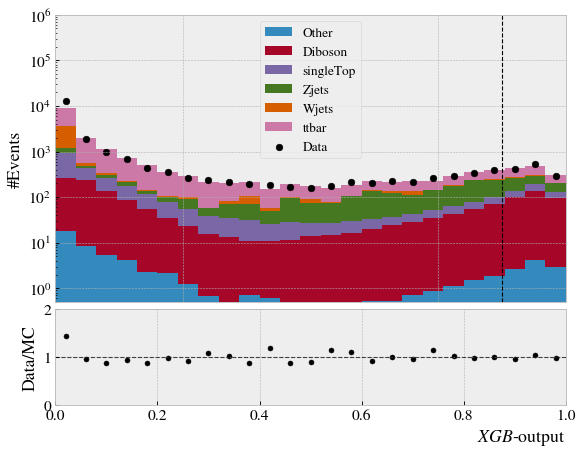

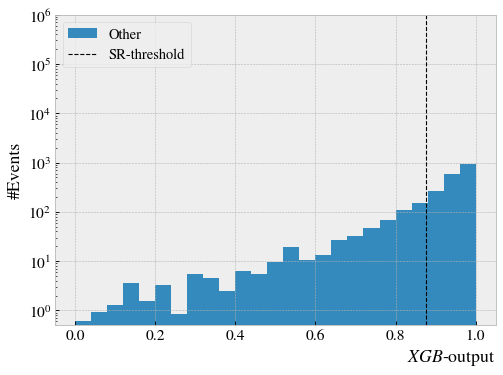

In [43]:
xbg_pred_data = xgb.predict_proba(np.array(df_data))[:,1]
N, bins = np.histogram(xbg_pred_data, bins = 25, range=(0.,1.))
x = (np.array(bins[0:-1]) + np.array(bins[1:]))/2

fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, num=0, dpi=80, facecolor='w', edgecolor='k',figsize = (7.4, 5.8))
ax1.set_yscale("log")
ax1.set_ylabel("#Events", fontsize=16)
ax1.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
n, bins, patches = ax1.hist(df_output, weights = weights, bins = 25, range=(0.,1.), histtype = "barstacked", stacked = True, label = cats)
ax1.scatter(x, N, c = "black", label = "Data")
ax1.legend(fontsize=12)
ax1.set_xlim([bins[0], bins[-1]])
ax1.set_ylim([5e-1,1e6])
ax1.set_xticks([0.25, 0.75], labels = ["False","True"])
ax1.axvline(x=threshold, color="black", linestyle="--", linewidth = 1.0, label = "SR-threshold")
diff = 0


s = 0
n = []
for j in range(len(bins)-1):
    s = 0
    for i in range(len(df_output)):
        s += np.sum(weights[i][(df_output[i] < bins[j+1]) * (df_output[i] > bins[j])])
    n.append(s)


ax2.scatter(x , N/np.array(n), c = "k", alpha = 1, s = 20)
ax2.axhline(1, linestyle = "--", c = "k", alpha = 0.7, linewidth = 1)
ax2.set_xlabel(r"$XGB$-output", fontsize=16, loc = "right")
ax2.set_xlim([bins[0], bins[-1]])
ax2.set_ylim([0, 2])
ax2.set_ylabel("Data/MC", fontsize =  16)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/XGB_dist.pdf")
plt.show()

fig = plt.figure(figsize = (6.4, 4.8), num=0, dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)
plt.xlabel(r"$XGB$-output", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.yscale("log")
plt.ylim([5e-1,1e6])
plt.hist(SUSY_output, weights = SUSY_weights, bins = 25, range=(0,1), histtype = "barstacked", stacked = True, label = cats, zorder=0)
plt.axvline(x=threshold, color="black", linestyle="--", linewidth = 1.0, label = "SR-threshold")
plt.legend(fontsize=13)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("figures/XGB_SUSY.pdf")
plt.show()

## Compare events in the signal region

In [45]:
n_obs_ML = np.sum(np.array(xbg_pred_data>threshold))
n_obs_nML = len(xbg_pred_data)

bkg_ML = 0
bkg_nML = 0
bkg_expt = 0
nr_events_AMLC = [np.sum(SUSY_weights[SUSY_output>threshold])]
print('SUSYSlepSlep',int(nr_events_AMLC[0]))
for i in range(len(df_output)):
    chan_bkg = np.sum(weights[i][df_output[i]>threshold])
    nr_events_AMLC.append(chan_bkg)
    if cats[i] != 'SUSYSlepSlep':
        bkg_ML += chan_bkg
        bkg_nML += np.sum(weights[i])
    print(f"{cats[i]} {int(chan_bkg):.2e}")
print(" ")
print(f"--- SR analysis with ML ---")
print(f"n_obs: {n_obs_ML} --- ML: bkg: {int(bkg_ML)} ")
print(f"n_obs - bkg = {int(n_obs_ML-bkg_ML)}")
print("")
print(f"--- SR analysis without ML ---")
print(f"n_obs: {n_obs_nML} --- ML: bkg: {int(bkg_nML)} ")
print(f"n_obs - bkg = {int(n_obs_nML-bkg_nML)}")

SUSYSlepSlep 1806
Other 1.00e+01
Diboson 3.37e+02
singleTop 1.20e+02
Zjets 3.10e+02
Wjets 4.00e+01
ttbar 4.47e+02
 
--- SR analysis with ML ---
n_obs: 1284 --- ML: bkg: 1266 
n_obs - bkg = 17

--- SR analysis without ML ---
n_obs: 22495 --- ML: bkg: 18718 
n_obs - bkg = 3776


In [46]:
SUSY_index = df_category == "SUSYSlepSlep"
SUSY_events = df[SUSY_index]
SUSY_masses = df_physdescr[SUSY_index].unique()
SUSY_nr_events_AMLC = {}
CL_SB = []
effic_ML = {}
effic_nML = {}

In [47]:
for i in range(len(SUSY_masses)):
    mass_index = df_physdescr == SUSY_masses[i]
    X_mass = df[mass_index]
    weight_mass = df_weights[mass_index].array
    pred = xgb.predict_proba(X_mass)[:,1]
    SUSY_nr_events_AMLC[SUSY_masses[i]] = np.sum(weight_mass[np.array(pred>threshold)])
    effic_ML[SUSY_masses[i]] = SUSY_nr_events_AMLC[SUSY_masses[i]]/SUSY_nr_events_BC[SUSY_masses[i]]
    effic_nML[SUSY_masses[i]] = SUSY_nr_events_AVC[SUSY_masses[i]]/SUSY_nr_events_BC[SUSY_masses[i]]
    #print(f"{SUSY_masses[i]}: After Variable Cuts {int(SUSY_nr_events_AVC[SUSY_masses[i]])}, eff = {effic_nML[SUSY_masses[i]]:.2f}")
    print(f"{SUSY_masses[i]}: After ML Cuts {int(SUSY_nr_events_AMLC[SUSY_masses[i]])}, eff = {effic_ML[SUSY_masses[i]]:.2f}")

SlepSlep_direct_200p5_1p0_2L8: After ML Cuts 202, eff = 0.51
SlepSlep_direct_200p0_100p0_2L8: After ML Cuts 144, eff = 0.39
SlepSlep_direct_500p5_1p0_2L8: After ML Cuts 2, eff = 0.27
SlepSlep_direct_700p0_300p0_2L8: After ML Cuts 0, eff = 0.24
SlepSlep_direct_600p0_300p0_2L8: After ML Cuts 0, eff = 0.32
SlepSlep_direct_600p0_1p0_2L8: After ML Cuts 0, eff = 0.22
SlepSlep_direct_700p0_1p0_2L8: After ML Cuts 0, eff = 0.17
SlepSlep_direct_100p5_1p0_2L8: After ML Cuts 912, eff = 0.22
SlepSlep_direct_500p0_300p0_2L8: After ML Cuts 3, eff = 0.45
SlepSlep_direct_500p0_100p0_2L8: After ML Cuts 2, eff = 0.29
SlepSlep_direct_300p0_200p0_2L8: After ML Cuts 30, eff = 0.42
SlepSlep_direct_300p5_1p0_2L8: After ML Cuts 36, eff = 0.48
SlepSlep_direct_100p0_50p0_2L8: After ML Cuts 461, eff = 0.12
SlepSlep_direct_400p0_300p0_2L8: After ML Cuts 8, eff = 0.41


In [48]:
M = []
LM = []
NM = []
for i in range(len(SUSY_masses)):
    string = SUSY_masses[i].split("_")
    lm, nm = string[2].split("p")[0] + "." + string[2].split("p")[1]  , string[3].split("p")[0]
    LM.append(float(lm))
    NM.append(float(nm))
    M.append(f"{lm} -- {nm}")


sort_indx = sorted(range(len(LM)), key=lambda k: LM[k])

M = [M[i] for i in sort_indx]
effic_l1 = list(effic_ML.values())
effic_ML = [effic_l1[i] for i in sort_indx]
effic_l2 = list(effic_nML.values())
effic_nML = [effic_l2[i] for i in sort_indx]

nr_Events_AMLC = list(SUSY_nr_events_AMLC.values())
nr_Events_AMLC = [nr_Events_AMLC[i] for i in sort_indx]


print(effic_nML)
print(effic_ML)

[0.17360770668907555, 0.2807782285092719, 0.46118653923888275, 0.570999603595732, 0.48367531796392194, 0.5296722303632975, 0.475117811503906, 0.491924272375922, 0.3221606420416333, 0.30961636396511966, 0.35760222518614626, 0.24840426485835665, 0.26246340064175133, 0.19467428007255158]
[0.12352615261137447, 0.22091457879966606, 0.3923231501331583, 0.5107086495568737, 0.41932259619960693, 0.47875958013646336, 0.41393195604060284, 0.44795965835551127, 0.28557546471056783, 0.2743997212080965, 0.32239356801950714, 0.2222556473794796, 0.2373160129178137, 0.17335705209304492]


## Result from statistical analysis with ML output

In [49]:
OLim = [123.79, 69.1, 36.77, 27.37, 33.8, 21.83, 33.15, 21.41, 19.31, 19.0, 19.21, 18.42, 18.61, 18.37]
#OLim = [122.65, 68.69, 38.68, 29.67, 36.24, 31.69, 36.66, 33.87, 53.13, 55.3, 47.07, 68.17, 63.84, 87.39]
OLim_1p5 = [96.69, 54.17, 30.5, 23.43, 28.54, 25.0, 28.91, 26.66, 41.9, 43.61, 37.12, 53.84, 50.43, 69.03]
print(SUSY_nr_events_AMLC.values())

nr_Events = np.around(np.array(nr_Events_AMLC))/10
OLim = np.array(OLim)

OLim = np.insert(OLim,0, OLim[0])
OLim_1p5 = np.insert(OLim_1p5,0, OLim_1p5[0])
x = np.linspace(0.5,len(nr_Events)+0.5, len(OLim))
print(nr_Events)
print(OLim)

dict_values([202.84159812359525, 144.41530259612304, 2.2327415769499606, 0.31383777994546064, 0.9562820433284047, 0.6602242441795252, 0.22676519300660258, 912.6577805989425, 3.4494331660601527, 2.200116958919206, 30.3978033716142, 36.83924808699749, 461.1420246338041, 8.48382013146854])
[46.1 91.3 14.4 20.3  3.   3.7  0.8  0.3  0.2  0.2  0.1  0.1  0.   0. ]
[123.79 123.79  69.1   36.77  27.37  33.8   21.83  33.15  21.41  19.31
  19.    19.21  18.42  18.61  18.37]


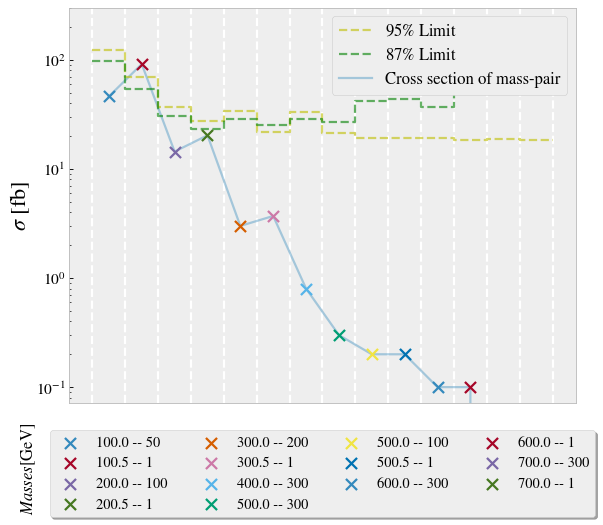

In [51]:
fig = plt.figure(figsize = (7.4, 5.8), num=0, dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)
ax.set_ylabel(r"$\sigma$ [fb]", fontsize=20)
for i in range(len(nr_Events)): 
    ax.scatter(i+1, nr_Events[i], marker = "x", label = M[i], s = 100,zorder=i+10)
ax.set_yscale("log")
ax.set_ylim(top = 3e2)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.figtext(0.04, -0.02, r"$Masses$[GeV]", rotation=90, va='center', fontsize = 15)

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
legend1 = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=4, fontsize=13)
plt.plot(x, OLim, "--",drawstyle='steps', c = 'y', alpha = 0.6, zorder=1)
plt.plot(x, OLim_1p5, "--",drawstyle='steps', c = 'g', alpha = 0.6)

plt.plot(range(1,len(nr_Events)+ 1), nr_Events, alpha = 0.4, zorder=0)
lines = ax.get_lines()
legend2 = plt.legend(lines, [r'$95\%$ Limit', r'$87\%$ Limit','Cross section of mass-pair' ], loc='upper right',fontsize=15, framealpha = 1)
ax.add_artist(legend1)
for xi in x:
    ax.axvline(xi, linestyle = "--", zorder=-1, alpha = 1, c = "white")
plt.grid(False)
plt.savefig("figures/ExlusionEvents.pdf", bbox_inches = 'tight')
plt.show()

## No ML cuts search

In [78]:
new_cuts = ((df["lep1_pt"] < 250*1000)  & (abs(df["mll"])<225*1000) & (df["met_et"] > 75*1000) & (df["met_et"] < 120*1000) & (df['njet20']==0) & (df["lep2_pt"] < 200*1000) )
new_cuts_d = ((df_data["lep1_pt"] < 250*1000)  & (abs(df_data["mll"])<225*1000) & (df_data["met_et"] > 75*1000) & (df_data["met_et"] < 120*1000) & (df_data['njet20']==0) & (df_data["lep2_pt"] < 200*1000))

df_ex = df[new_cuts]
df_data_ex = df_data[new_cuts_d]
df_weights_ex = df_weights[new_cuts]
df_cats_ex = df_category[new_cuts]
df_physdescr_ex = df_physdescr[new_cuts]

In [79]:
n_obs_nML = len(df_data_ex)
bkg_nML = 0

print(f"SUSY {np.sum(df_weights_ex[df_cats_ex == 'SUSYSlepSlep'])}")
for i in range(len(df_output)):
    
    chan_bkg = np.sum(df_weights_ex[df_cats_ex == cats[i]])
    bkg_nML += chan_bkg
    print(f"{cats[i]}: {int(chan_bkg):.2e}")

print(f"--- SR analysis without ML ---")
print(f"n_obs: {n_obs_nML} --- bkg: {int(bkg_nML)} ")
print(f"n_obs - bkg = {int(n_obs_nML-bkg_nML)}")

SUSY 175.03493806424723
Other: 3.00e+00
Diboson: 8.00e+01
singleTop: 2.50e+01
Zjets: 9.50e+01
Wjets: 1.49e+02
ttbar: 6.50e+01
--- SR analysis without ML ---
n_obs: 737 --- bkg: 419 
n_obs - bkg = 317


In [80]:
SUSY_index_ex = df_cats_ex == "SUSYSlepSlep"
SUSY_masses_ex = df_physdescr_ex[SUSY_index].unique()
SUSY_nr_events_AMEVC = {}
CL_SB = []
effic_AMEVC = {}

In [81]:
for i in range(len(SUSY_masses_ex)):
    mass_index = df_physdescr_ex == SUSY_masses_ex[i]
    weight_mass = df_weights_ex[mass_index].array
    SUSY_nr_events_AMEVC[SUSY_masses_ex[i]] = np.sum(weight_mass)
    effic_AMEVC[SUSY_masses[i]] = SUSY_nr_events_AMEVC[SUSY_masses_ex[i]]/SUSY_nr_events_BC[SUSY_masses_ex[i]]

In [82]:
M = []
LM = []
NM = []
for i in range(len(SUSY_masses_ex)):
    string = SUSY_masses_ex[i].split("_")
    lm, nm = string[2].split("p")[0] + "." + string[2].split("p")[1]  , string[3].split("p")[0]
    LM.append(float(lm))
    NM.append(float(nm))
    M.append(f"{lm} -- {nm}")

sort_indx = sorted(range(len(LM)), key=lambda k: LM[k])


M = [M[i] for i in sort_indx]
effic_l1 = list(effic_AMEVC.values())
effic_AMEVC = [effic_l1[i] for i in sort_indx]


SUSY_nr_events_AMEVC_l = list(SUSY_nr_events_AMEVC.values())
SUSY_nr_events_AMEVC = [SUSY_nr_events_AMEVC_l[i] for i in sort_indx]
print(effic_AMEVC)

[0.01565984024969314, 0.02426460434184756, 0.024328839750705464, 0.012231038311051243, 0.02227251450816351, 0.006586860625436512, 0.016093313376787693, 0.004677968844484451, 0.0014985561809199243, 0.0012917362207601373, 0.0017596707426664904, 0.000357662397683449, 0.0001946644211458871, 0.0010928961056563729]


In [83]:
OLim = [154.41, 86.34, 48.62, 37.35, 45.49, 39.84, 46.08, 42.58, 66.79, 69.51, 59.16, 85.82, 80.37, 110.03]
OLim_1p5 = [144.82, 80.98, 45.61, 35.03, 42.66, 37.36, 43.22, 39.93, 62.64, 65.19, 55.6, 80.49, 75.4, 103.19]

nr_Events = np.around(np.array(SUSY_nr_events_AMEVC))/10
OLim = np.array(OLim)

OLim = np.insert(OLim,0, OLim[0])
OLim_1p5 = np.insert(OLim_1p5,0, OLim_1p5[0])
x = np.linspace(0.5,len(nr_Events)+0.5, len(OLim))
print(nr_Events)
print(OLim)

[ 5.8 10.   0.9  0.5  0.2  0.1  0.   0.   0.   0.   0.   0.   0.   0. ]
[154.41 154.41  86.34  48.62  37.35  45.49  39.84  46.08  42.58  66.79
  69.51  59.16  85.82  80.37 110.03]


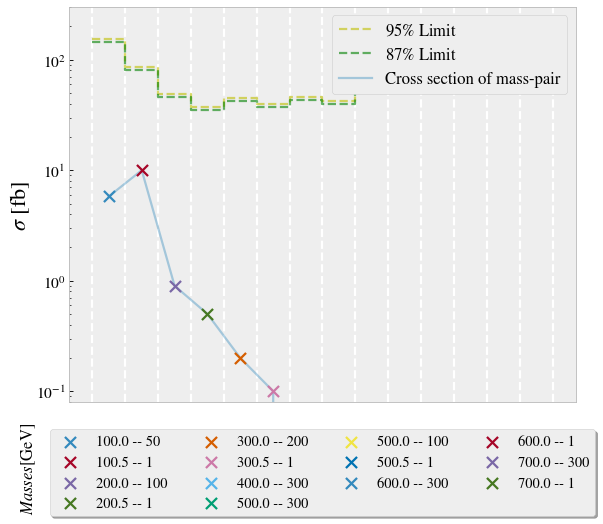

In [84]:
fig = plt.figure(figsize = (7.4, 5.8), num=0, dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)
ax.set_ylabel(r"$\sigma$ [fb]", fontsize=20)
for i in range(len(nr_Events)): 
    ax.scatter(i+1, nr_Events[i], marker = "x", label = M[i], s = 100,zorder=i+10)
ax.set_yscale("log")
ax.set_ylim(top = 3e2)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.figtext(0.04, -0.02, r"$Masses$[GeV]", rotation=90, va='center', fontsize = 15)

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
legend1 = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=4, fontsize=13)
plt.plot(x, OLim, "--",drawstyle='steps', c = 'y', alpha = 0.6, zorder=1)
plt.plot(x, OLim_1p5, "--",drawstyle='steps', c = 'g', alpha = 0.6)

plt.plot(range(1,len(nr_Events)+ 1), nr_Events, alpha = 0.4, zorder=0)
lines = ax.get_lines()
legend2 = plt.legend(lines, [r'$95\%$ Limit', r'$87\%$ Limit','Cross section of mass-pair' ], loc='upper right',fontsize=15, framealpha = 1)
ax.add_artist(legend1)
for xi in x:
    ax.axvline(xi, linestyle = "--", zorder=-1, alpha = 1, c = "white")
plt.grid(False)
plt.savefig("figures/ExlusionEvents_nML.pdf",bbox_inches = 'tight')
plt.show()